In [1]:
%matplotlib inline

In [2]:
from maelzel.core import *
from maelzel.core import plotting

In [3]:
s = Score([
    Voice(r'''
      3F+,3A:1.25
      4C+:1:mf
      4Db:0.5
      4D-:1:gliss
      5Gb-!,4A:ff
      0A:1
    ''')
])

getWorkspace().setScoreStruct(r'''4/4; 3/4''')


<Axes: >

/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/events.py:96: UserWarning: Glyph 108 (l) missing from font(s) Bravura.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/events.py:96: UserWarning: Glyph 112 (p) missing from font(s) Bravura.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Bravura.
  fig.canvas.print_figure(bytes_io, **kw)
/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Bravura.
  fig.canvas.print_figure(bytes_io, **kw)


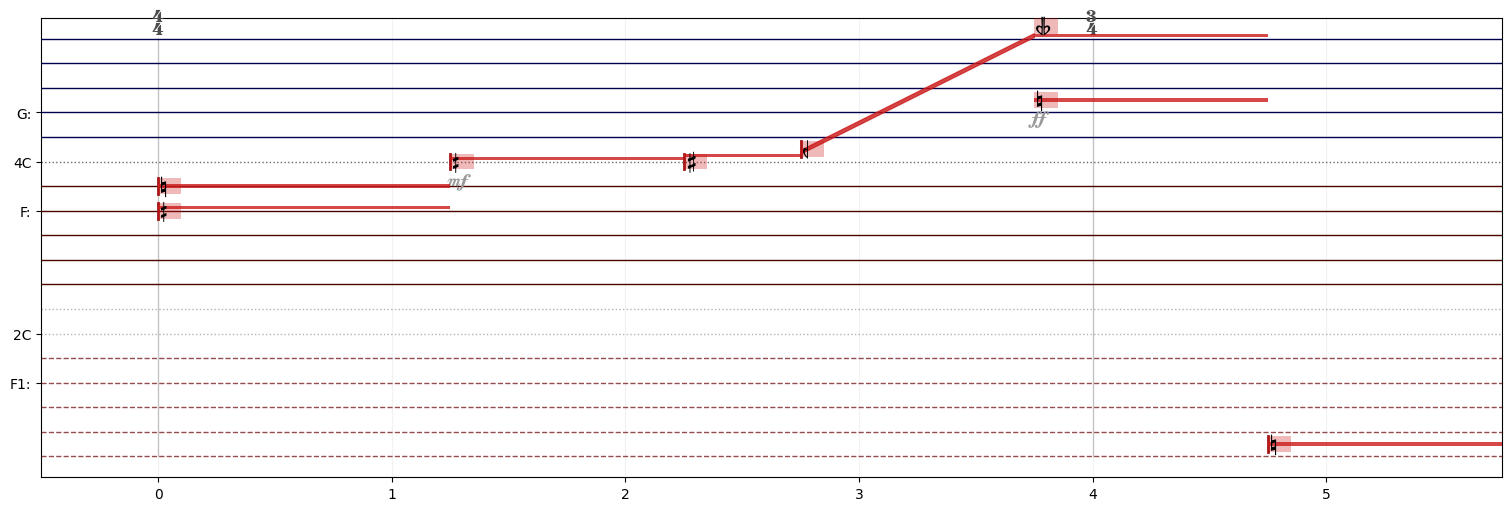

In [4]:
s.plot()

In [7]:
s = Score([
    Voice(r'''
      3F+,3A:1.25
      4C+:1:mf
      4Db:0.5
      4D-:1:gliss
      6Gb-!,4A:ff
      1C:1
    '''),
    Voice(r'''
      3F+,3A:1.25
      4C+:1:mf
      4Db:0.5:pp
      4D-:1:gliss
      6Gb-!,4A:ff
      1C:1
    ''') # .timeShift(0.5).transpose(-2.5)
])

getWorkspace().setScoreStruct(r'''
5/8
7/8
''')

<Axes: >

/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/events.py:96: UserWarning: Glyph 108 (l) missing from font(s) Bravura.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/events.py:96: UserWarning: Glyph 112 (p) missing from font(s) Bravura.
  func(*args, **kwargs)
/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Bravura.
  fig.canvas.print_figure(bytes_io, **kw)
/home/em/.virtualenvs/maelzel/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Bravura.
  fig.canvas.print_figure(bytes_io, **kw)


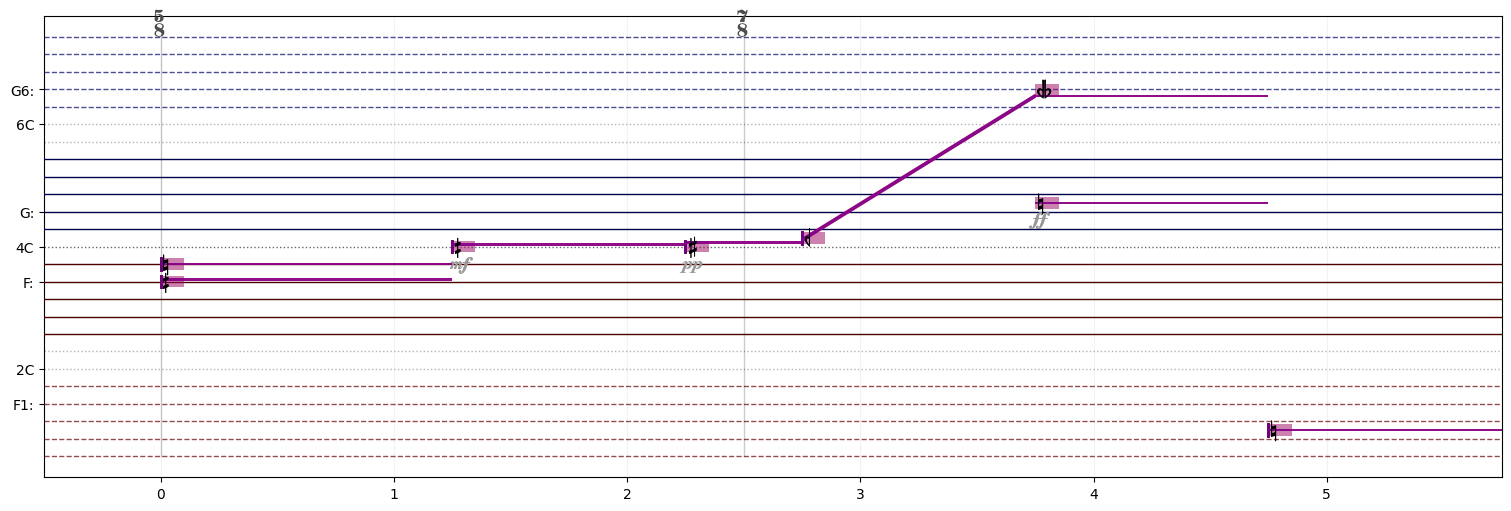

In [8]:
plotting.plotVoices(s.voices)

## Test clips

In [1]:
from maelzel.core import *
w = ws()
w.scorestruct = "4/4"
cl = Clip("../snd/colours-german-male.flac", pitch=60, speed=1)
samp = cl.asSample()
onsets = samp.onsets(threshold=0.04, mingap=0.05)
struct = getWorkspace().scorestruct
onsetbeats = [struct.timeToBeat(onset) for onset in onsets]

from itertools import pairwise
durs = [min(o2 - o1, 1/4) for o1, o2 in pairwise(onsetbeats)]


In [2]:
import pitchtools as pt
f0, voicedbpf = samp.fundamentalBpf()
freqs = f0.map(onsets)
transcr = Voice([Note(pt.f2m(freq), dur=dur, offset=beat) for beat, dur, freq in zip(onsetbeats, durs, freqs) if freq > 60])


LibXtract compiled with ooura FFT


mnOut size: 926
m_pitchTrack size: 926


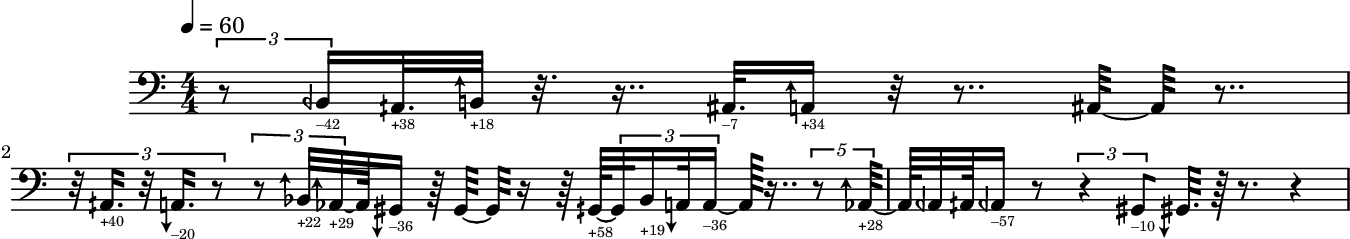

In [4]:
transcr.show(complexity='speech')

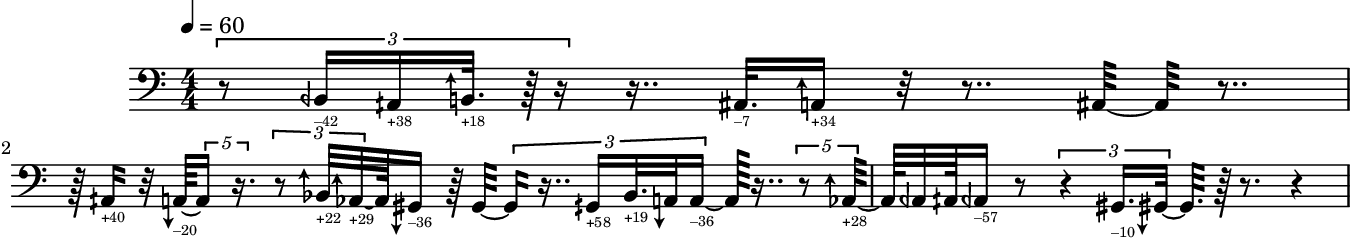

In [5]:
transcr.show(complexity='low')

In [9]:
with play():
    transcr.play(instr='.piano', position=1)
    cl.play(position=0)